<a href="https://colab.research.google.com/github/Staneering/E-Commerce-Product-Classification/blob/main/E_Commerce_Product_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! chmod 600 kaggle.json
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d kritanjalijain/fashionoutfititems


100% 6.50G/6.51G [00:55<00:00, 45.6MB/s]
100% 6.51G/6.51G [00:55<00:00, 126MB/s] 


In [ ]:
!unzip -q fashionoutfititems.zip

In [ ]:
import pandas as pd
import os

# Define the desired data directory
data_dir = "/content/outfit_items_dataset/"

# Function to extract information from filenames
def extract_info(filename):
    # Split filename by '/' and keep last two parts for item name and category
    parts = filename.split("/")[-2:]
    # Remove extension from item name
    item_name = parts[0].rstrip(".png")
    # Combine category parts with space separation
    category = " ".join(parts)
    return item_name, category

# Initialize an empty list to store data
data = []

# Walk through the data directory
for root, dirs, files in os.walk(data_dir):
    print(dirs)
    for filename in files:
        # Extract item name and category
        item_name, category = extract_info(filename)
        item_name = root.split("/")[-1]
        category = root.split("/")[-2]
        # Append data to the list
        data.append({"filename": filename, "itemname": item_name, "categories": category})

# Create the DataFrame from the list
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
# df.to_csv("output.csv", index=False)

print("DataFrame created and saved as output.csv")


In [ ]:
data = pd.read_csv("clothes.csv")
data.head()

,filename,itemname,categories,color,url,subcat
0,upperwear_shirt763.png,shirt,upperwear,Black,/content/outfit_items_dataset/upperwear/shirt/...,Button-down
1,upperwear_shirt1798.png,shirt,upperwear,Light Blue,/content/outfit_items_dataset/upperwear/shirt/...,Button-down
2,upperwear_shirt1919.png,shirt,upperwear,Sky Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved
3,upperwear_shirt3257.png,shirt,upperwear,Navy Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved
4,upperwear_shirt3127.png,shirt,upperwear,White,/content/outfit_items_dataset/upperwear/shirt/...,Blouse


In [ ]:
data.shape

(48355, 6)

In [ ]:
categories = {
        "Sleeve length": [
            "Sleeveless",
            "Short sleeves",
            "Long sleeves",
        ],
        "Neckline": [
            "Crew neck",
            "V-neck",
            "Collared"
        ],
        "Closure": [
            "full button-up",
            "partial button-up",
            "Henley",
            "Zipper",
            "Pullover"
        ],
        "Material": [
            "cotton",
            "linen",
            "hemp",
            "wool",
            "Synthetic fibers",
            "Blends"
        ],
        "Pattern": [
            "Solid",
            "Striped Vertical",
             "Striped horizontal",
            "Striped diagonal",
            "Plaid",
            "Floral",
            "animal print",
            "geometric print",
            "paisley"
        ],
      "Logos": [
            "Logo",
            "no Logo",
        ],
        "Pockets": [
            "no pockets",
            "one pocket",
            "two pockets",
        ],
        "Pockets style": [
            "chest pockets",
            "patch pockets",
            "flap pockets",
        ],
        "Embroidery": [
            "embroidery",
            "appliqués",
            "sequins",
            "None"
        ],
        "Unique design features": [
            "Ruching",
            "cutouts",
            "asymmetrical design"
        ]
    }


In [ ]:
data = data[data["itemname"] == "shirt"]
data.shape

(3896, 6)

In [ ]:
data.itemname.unique()

array(['shirt'], dtype=object)

<Axes: xlabel='categories', ylabel='count'>

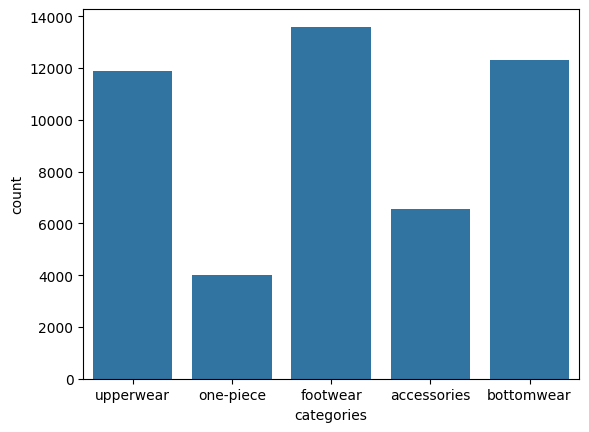

In [ ]:
sns.countplot(x = data["categories"])

In [ ]:
data.categories.unique()

array(['upperwear', 'one-piece', 'footwear', 'accessories', 'bottomwear'],
      dtype=object)

In [ ]:
cats = [str(i) for i in data.itemname.unique()]
print(cats)

['shirt', 'jacket', 'tshirt', 'dress', 'shoes', 'flats', 'sneakers', 'heels', 'hat', 'bag', 'shorts', 'pants', 'skirt']


In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)


In [ ]:
def get_what(image, look):
  # url = "https://www.shutterstock.com/image-photo/vintage-red-shoes-on-white-260nw-92008067.jpg"
  image = Image.open(image)
  # image = Image.open(requests.get(url, stream=True).raw)

  inputs = processor(text = look , images=image, return_tensors="pt", padding=True)
  # Move input tensors to the appropriate device
  inputs = {key: value.to(device) for key, value in inputs.items()}

  outputs = model(**inputs)
  logits_per_image = outputs.logits_per_image # this is the image-text similarity score
  probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
  return look[probs.argmax()]

In [ ]:
data["color"].nunique()

45

In [ ]:
from tqdm import tqdm

In [ ]:
# /content/outfit_items_dataset/bottomwear/shorts/bottomwear_shorts1.png
for __category in categories.keys():
  classes = categories[__category]
  for index, row in tqdm(data.iterrows(), total = len(data)):
    # if pd.isnull(data.loc[index, __category]):
      floc = "/content/outfit_items_dataset/" + row["categories"] + "/" + row["itemname"] + "/" + row["filename"]
      what = classes
      output = get_what(floc, what)
      # print("\n",colord, row["itemname"], floc)
      # if index > 10:
        # break
      data.at[index, __category] = output

In [ ]:
for i in categories.keys():
  print(i)

Sleeve length
Neckline
Closure
Material
Pattern
Logos
Pockets
Pockets style
Embroidery
Unique design features


In [ ]:
# prompt: for data.color with missing value, print (data.filename)

for i in data.index:
    if pd.isnull(data.loc[i, 'color']):
        print(data.loc[i, 'filename'])


In [ ]:
data.iloc[0:50]

,filename,itemname,categories,color,url,subcat,Sleeve length
0,upperwear_shirt763.png,shirt,upperwear,Black,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Long sleeves
1,upperwear_shirt1798.png,shirt,upperwear,Light Blue,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
2,upperwear_shirt1919.png,shirt,upperwear,Sky Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved,Long sleeves
3,upperwear_shirt3257.png,shirt,upperwear,Navy Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved,Short sleeves
4,upperwear_shirt3127.png,shirt,upperwear,White,/content/outfit_items_dataset/upperwear/shirt/...,Blouse,Short sleeves
5,upperwear_shirt2195.png,shirt,upperwear,White,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
6,upperwear_shirt2114.png,shirt,upperwear,Purple,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
7,upperwear_shirt2.png,shirt,upperwear,Goldenrod,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
8,upperwear_shirt877.png,shirt,upperwear,Black,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
9,upperwear_shirt3617.png,shirt,upperwear,Light Blue,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves


In [ ]:
import time
for i in tqdm(range(10), total=10):
  time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [ ]:
image = Image.open("/content/outfit_items_dataset/upperwear/shirt/upperwear_shirt3127.png")

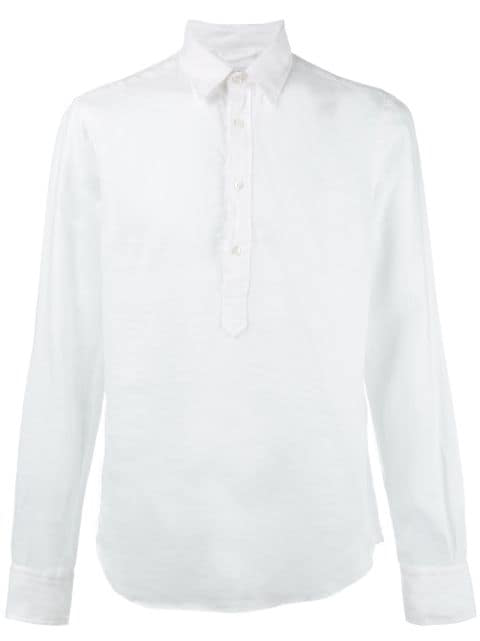

In [ ]:
image

In [ ]:
data.head()

,filename,itemname,categories,color,url,subcat
0,upperwear_shirt763.png,shirt,upperwear,Black,/content/outfit_items_dataset/upperwear/shirt/...,Button-down
1,upperwear_shirt1798.png,shirt,upperwear,Light Blue,/content/outfit_items_dataset/upperwear/shirt/...,Button-down
2,upperwear_shirt1919.png,shirt,upperwear,Sky Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved
3,upperwear_shirt3257.png,shirt,upperwear,Navy Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved
4,upperwear_shirt3127.png,shirt,upperwear,White,/content/outfit_items_dataset/upperwear/shirt/...,Blouse


In [ ]:
import torch
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the CLIP model and processor onto the device
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

# Sample image URL
image_url = "/content/vintage-red-shoes-on-white-260nw-92008067.jpg"

# Load image from URL
image = Image.open(image_url)

# Preprocess the image
inputs = processor(text=["yellow", "black", "red"], images=image, return_tensors="pt", padding=True)

# Move input tensors to the appropriate device
inputs = {key: value.to(device) for key, value in inputs.items()}

# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

# Retrieve the features
image_features = outputs.last_hidden_state



FileNotFoundError: [Errno 2] No such file or directory: '/content/vintage-red-shoes-on-white-260nw-92008067.jpg'

In [ ]:
data.to_csv("output.csv", index=False)

In [ ]:
data.itemname.unique()

array(['shirt', 'jacket', 'tshirt', 'dress', 'shoes', 'flats', 'sneakers',
       'heels', 'hat', 'bag', 'shorts', 'pants', 'skirt'], dtype=object)

In [ ]:
for i, row in data[data["itemname"] == "hat"].tail().iterrows():
  print(row)
  a = row["url"]
  break


filename                                 accessories_hat707.png
itemname                                                    hat
categories                                          accessories
color                                                    Yellow
url           /content/outfit_items_dataset/accessories/hat/...
subcat                                            Baseball caps
Name: 32025, dtype: object


In [ ]:
image = Image.open(a)

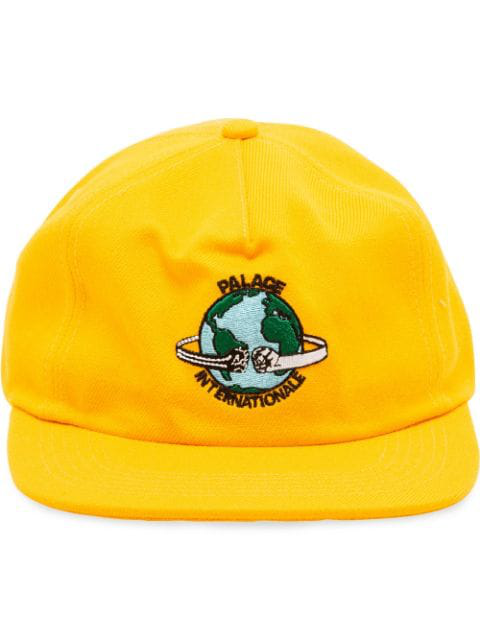

In [ ]:
image

In [ ]:
# categories = {

#         "shirt": ["Plain", "Striped", "Patterned", "Button-down", "Collared", "V-neck", "Crewneck", "Long-sleeved", "Short-sleeved", "Crop top", "Tank top", "Blouse"],
#         "jacket": ["Denim jacket", "Bomber jacket", "Leather jacket", "Blazer", "Parka", "Puffer jacket", "Trench coat", "Cardigan"],
#         "tshirt": ["Graphic tees", "Plain tees", "Pocket tees", "V-neck tees", "Henley tees", "Crop tees"],
#         "dress": ["Casual dresses", "Sundresses", "Formal dresses", "Maxi dresses", "Midi dresses", "Mini dresses", "Wrap dresses", "Shift dresses", "Bodycon dresses"],
#         "shoes": ["Boots","Ankle boots", "Knee-high boots", "Hiking boots","Sandals"],
#         "flats" : ["flats"],
#         "sneakers" : ["sneakers"],
#         "heels" : ["heels"],
#         "shorts": ["Denim shorts", "Chino shorts", "Athletic shorts", "Cargo shorts", "Board shorts"],
#         "pants": ["Jeans", "Chinos", "Dress pants", "Leggings", "Cargo pants", "Joggers", "Sweatpants"],
#         "skirt": ["Mini skirts", "Midi skirts", "Maxi skirts", "Pencil skirts", "A-line skirts", "Pleated skirts"],
#         "hat": ["Baseball caps", "Beanies", "Fedoras", "Wide-brimmed hats", "Sun hats", "Winter hats"],
#         "bag": ["Totes", "Backpacks", "Crossbody bags", "Clutches", "Wallets", "Briefcases"]
#     }



In [ ]:
for i in ['shirt', 'jacket', 'tshirt', 'dress', 'shoes', 'flats', 'sneakers','heels', 'hat', 'bag', 'shorts', 'pants', 'skirt']:
       if i not in list(categories.keys()):
        print(i)

In [ ]:
se = [data["itemname"].unique().tolist(), data['color'].unique().tolist(), categories]
out = []
filename = "/content/download.jpg"
out.append(get_what(filename, se[0]))
out.append(get_what(filename, se[1]))
out.append(get_what(filename, se[2][out[0]]))


In [ ]:

out

['bag', 'Black', 'Crossbody bags']

In [ ]:
# prompt: search in data,itemname =  'shoes',  color = 'Black', subcat = 'Ankle boots'

output = data[(data['itemname'] == out[0]) & (data['color'] == out[1]) & (data['subcat'] == out[-1])]
output.head()

,filename,itemname,categories,color,url,subcat
32036,accessories_bag1347.png,bag,accessories,Black,/content/outfit_items_dataset/accessories/bag/...,Crossbody bags
32038,accessories_bag12313.png,bag,accessories,Black,/content/outfit_items_dataset/accessories/bag/...,Crossbody bags
32040,accessories_bag10851.png,bag,accessories,Black,/content/outfit_items_dataset/accessories/bag/...,Crossbody bags
32048,accessories_bag12840.png,bag,accessories,Black,/content/outfit_items_dataset/accessories/bag/...,Crossbody bags
32049,accessories_bag11566.png,bag,accessories,Black,/content/outfit_items_dataset/accessories/bag/...,Crossbody bags


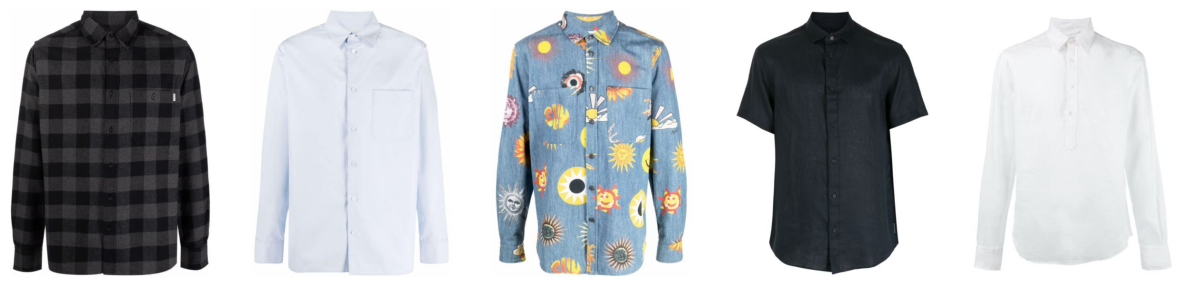

In [ ]:
# prompt: display the first five images using matplotlib

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axes):
    image_path = data.iloc[i]["url"]
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis("off")

plt.show()


In [ ]:
data.head()

,filename,itemname,categories,color,url,subcat,Sleeve length
0,upperwear_shirt763.png,shirt,upperwear,Black,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Long sleeves
1,upperwear_shirt1798.png,shirt,upperwear,Light Blue,/content/outfit_items_dataset/upperwear/shirt/...,Button-down,Short sleeves
2,upperwear_shirt1919.png,shirt,upperwear,Sky Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved,Long sleeves
3,upperwear_shirt3257.png,shirt,upperwear,Navy Blue,/content/outfit_items_dataset/upperwear/shirt/...,Short-sleeved,Short sleeves
4,upperwear_shirt3127.png,shirt,upperwear,White,/content/outfit_items_dataset/upperwear/shirt/...,Blouse,Short sleeves


In [ ]:
data.to_csv("ouput.csv", index = False)